<a href="https://colab.research.google.com/github/Prasadnaw/b/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
import pandas as pd 

col_names = ["pregnant", "bp", "glucose", "skin", "insulin", "bmi", "pedigree","age", "label"]

df = pd.read_csv("diabetes.csv", names=col_names).iloc[1:]

print(df.head())

  pregnant   bp glucose skin insulin   bmi pedigree age label
1        6  148      72   35       0  33.6    0.627  50     1
2        1   85      66   29       0  26.6    0.351  31     0
3        8  183      64    0       0  23.3    0.672  32     1
4        1   89      66   23      94  28.1    0.167  21     0
5        0  137      40   35     168  43.1    2.288  33     1


In [5]:
features = ["pregnant", "insulin", "bmi", "age", "glucose", "bp", "pedigree"]
x=df[features]
y = df.label

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =0)
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Acuracy", metrics.accuracy_score(y_test, y_pred))

Acuracy 0.7445887445887446


In [20]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<bp &le; 144.5<br/>gini = 0.462<br/>samples = 537<br/>value = [343, 194]<br/>class = 0>, fillcolor="#f4c8a9"] ;
1 [label=<age &le; 28.5<br/>gini = 0.368<br/>samples = 412<br/>value = [312, 100]<br/>class = 0>, fillcolor="#eda978"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<bmi &le; 30.45<br/>gini = 0.203<br/>samples = 218<br/>value = [193, 25]<br/>class = 0>, fillcolor="#e89153"] ;
1 -> 2 ;
3 [label=<pregnant &le; 7.0<br/>gini = 0.037<br/>samples = 106<br/>value = [104, 2]<br/>class = 0>, fillcolor="#e6833d"] ;
2 -> 3 ;
4 [label=<pedigree &le; 0.672<br/>gini = 0.019<br/>samples = 105<br/>value = [104, 1]<br/>class = 0>, fillcolor="#e5823b"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 92<br/>value = [92, 0]<br/>class = 0>, fillcolor="#e58139"] ;
4 -> 5 ;
6 [label=<pedigree &le; 0.685<br/>gini = 0.142<br/>samples = 13<br/>

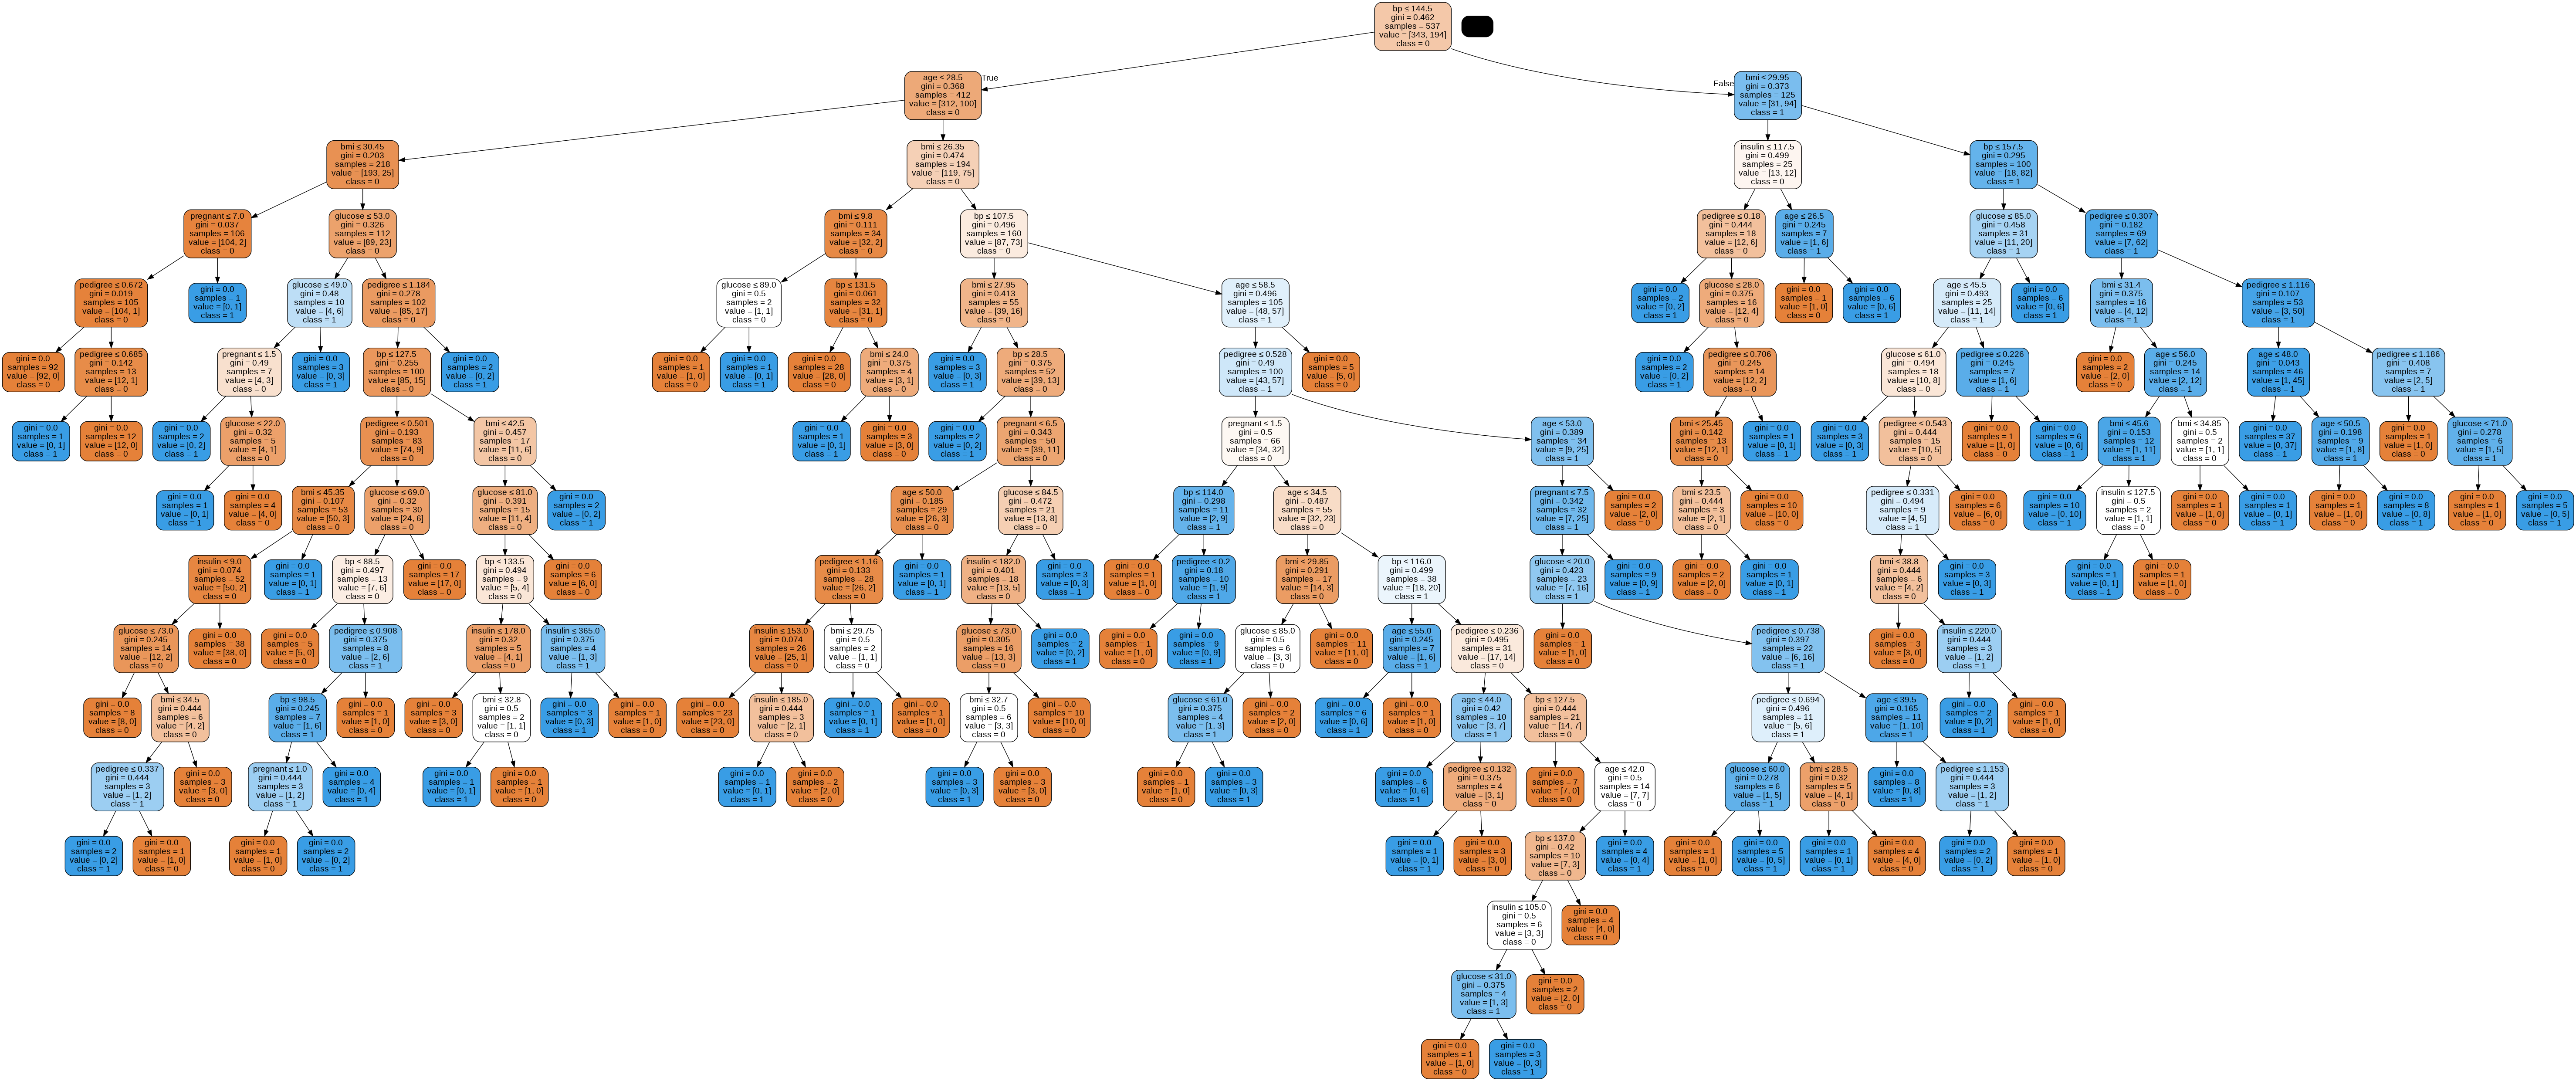

In [21]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [24]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Acuracy:", metrics.accuracy_score(y_test, y_pred))

Acuracy: 0.7272727272727273


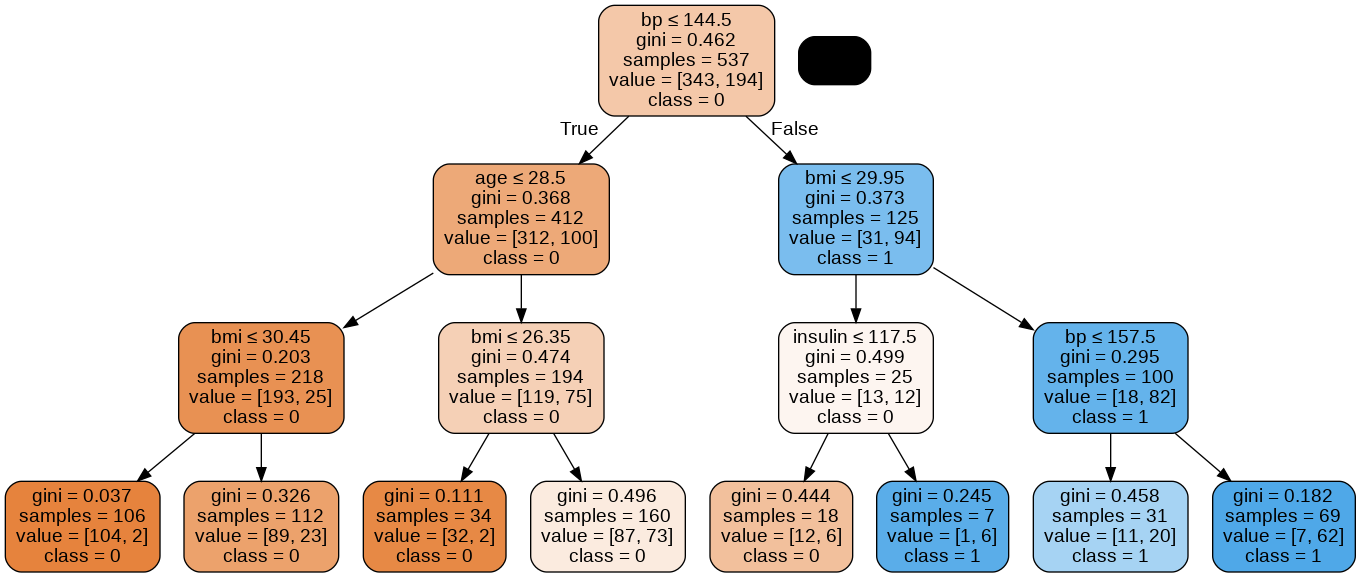

In [25]:
dot_data = StringIO() #Where we will store the data from our decision tree classifier as text.

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())